In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")

In [2]:
data30 = pd.read_csv('music30s_trainin.csv')
data30.head()

,Unnamed: 0,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0,661504,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,...,-4.922164,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205
1,1,661504,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,...,5.730653,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748
2,2,661794,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,...,-0.442143,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231
3,3,661794,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,...,0.975607,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821
4,4,661794,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,...,6.971109,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340


In [3]:
data30 = data30.drop(columns = ["Unnamed: 0", "length"]) # Removing unnamed and length columns
data30.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,6574.771380,4.659712e+06,...,-4.922164,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205
1,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,4306.240937,1.063089e+06,...,5.730653,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748
2,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,4580.418732,2.651598e+06,...,-0.442143,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231
3,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,3828.288761,1.247085e+06,...,0.975607,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821
4,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,4186.459372,7.265238e+05,...,6.971109,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340


In [4]:
scaler = MinMaxScaler()                 # Pre-processing the data using MinMaxScaling
model = scaler.fit(data30)
data30_scaled = model.transform(data30)
data30_scaled = pd.DataFrame(data30_scaled, columns = data30.columns)
data30_scaled.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.530572,0.696619,0.348285,0.171782,0.651867,0.430339,0.794782,0.381320,0.734768,0.537232,...,0.375180,0.253684,0.425846,0.152855,0.487987,0.186600,0.493990,0.182985,0.505029,0.097221
1,0.461259,0.768463,0.218712,0.061847,0.414080,0.078950,0.442797,0.147385,0.448646,0.121256,...,0.746220,0.138621,0.323413,0.109383,0.627626,0.172325,0.512566,0.111376,0.577711,0.106449
2,0.414717,0.621645,0.238531,0.041302,0.453231,0.176784,0.630752,0.212154,0.483227,0.304979,...,0.531220,0.111116,0.475342,0.092210,0.253925,0.096312,0.481367,0.058977,0.429967,0.051064
3,0.513368,0.682207,0.432729,0.128805,0.340710,0.081045,0.388727,0.164700,0.388363,0.142536,...,0.580601,0.101573,0.371888,0.052957,0.412203,0.093881,0.493261,0.089770,0.521860,0.084807
4,0.577931,0.526624,0.232481,0.013004,0.439586,0.042220,0.394737,0.113543,0.433538,0.082329,...,0.789426,0.082518,0.158994,0.066036,0.417036,0.045884,0.203264,0.062997,0.520941,0.044907


In [5]:
labels30 = pd.read_csv('music30s_trainlabel.csv')
labels30 = labels30.drop('Unnamed: 0', axis = 1)
labels30.head()

,label
0,reggae
1,reggae
2,country
3,blues
4,metal


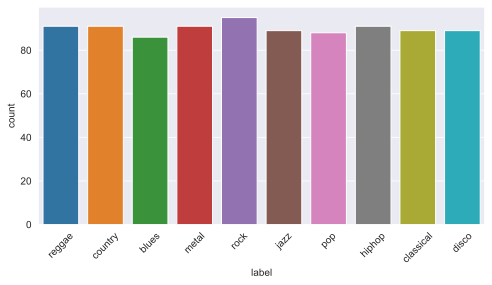

In [6]:
plt.figure(figsize = (8,4))
sns.set_style('darkgrid')
sns.countplot(x="label", data=labels30)
plt.xticks(rotation=45)
plt.savefig("sns_countplot.png")
plt.show()

In [7]:
le = LabelEncoder()                             # Converting the text labels into numerical labels 
label = le.fit_transform(labels30['label'])
labels30.drop("label", axis=1, inplace=True)
labels30['label'] = label
labels30.head()

,label
0,8
1,8
2,2
3,0
4,6


In [8]:
Xscaled = data30_scaled
y = labels30
print(Xscaled.shape, y.shape)

(900, 57) (900, 1)


In [9]:
def correlation(data, threshold):            # Dropping highly correlated columns from scaled data
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j] > threshold):
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features = correlation(Xscaled, 0.8)
print('correlated features', len(corr_features))

correlated features 17


In [10]:
X_uncorr = Xscaled.drop(labels = corr_features, axis = 1)    # Dropping the highly correlated data from scaled data set
X_uncorr.shape

(900, 40)

In [11]:
# Hyper parameter tuning

be1 = svm.SVC(kernel='linear', class_weight='balanced',probability=True)        # For AdaBoost algorithm
be2 = GaussianNB()
be3 = DecisionTreeClassifier(max_depth=50)

model_params = {
    'svm': {
        'model': svm.SVC(class_weight='balanced',probability=True),
        'params' : {
            'C': [0.1,1,100,110],
            'kernel': ['linear','rbf','poly','sigmoid'],
            'degree': [3,5,7,9],
            'gamma': ['scale', 'auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'criterion': ['entropy','gini'],       
            'n_estimators': [30,50,100,500],
            'max_depth': [10,20,30,50,100,200],
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    },
    'knn' : {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors':(5,9,10,15,20),
            'weights': ['uniform','distance'],
            'algorithm': ['auto','ball_tree', 'kd_tree', 'brute']
        }
    },
    'adb': {
        'model' : AdaBoostClassifier(algorithm='SAMME.R',n_estimators=100),
        'params' :{
            'base_estimator' : (be1, be2, be3),
            'random_state': (0,5,10)
        }
    }
}

In [15]:
def Randomizedsearch(X, y):  # This Function would return a dataframe with best score and
                                        # best parameters after Randomized search
    scores = []                            

    for model_name, mp in model_params.items():
        cross_val = StratifiedKFold(n_splits=5)
        clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=cross_val, n_iter = 10, n_jobs = -1, random_state=0)
        clf.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })

    pd.set_option('display.max_colwidth', -1)
    df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    return df

### Feature Selection using LDA

In [16]:
%%time
# LDA for scaled data
lda = LinearDiscriminantAnalysis('svd', n_components = 9)
X_sc_lda_svd = lda.fit_transform(Xscaled, y)

explained_variance = lda.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}\n')
print(f'Sum: {np.sum(explained_variance)}\n')

print(X_sc_lda_svd.shape)
Randomizedsearch(X_sc_lda_svd, y)

Explained Variance: [0.49312151 0.17120912 0.09590791 0.08387312 0.05570059 0.03768915
 0.03508162 0.02031593 0.00710104]

Sum: 1.0000000000000002

(900, 9)
Wall time: 2min 34s


,model,best_score,best_params
0,svm,0.760000,"{'kernel': 'linear', 'gamma': 'scale', 'degree': 9, 'C': 0.1}"
1,random_forest,0.771111,"{'n_estimators': 100, 'max_depth': 30, 'criterion': 'gini'}"
2,logistic_regression,0.767778,"{'solver': 'liblinear', 'C': 5}"
3,knn,0.773333,"{'weights': 'distance', 'n_neighbors': 20, 'algorithm': 'kd_tree'}"
4,adb,0.711111,"{'random_state': 5, 'base_estimator': DecisionTreeClassifier(max_depth=50)}"


In [17]:
%%time
# LDA on uncorrelated data

X_uncorr_lda_svd = lda.fit_transform(X_uncorr, y)

explained_variance = lda.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}\n')
print(f'Sum: {np.sum(explained_variance)}\n')

print(X_uncorr_lda_svd.shape)
Randomizedsearch(X_uncorr_lda_svd, y)

Explained Variance: [0.50115275 0.17656441 0.10684089 0.07415063 0.05429773 0.03941721
 0.02574918 0.01482375 0.00700345]

Sum: 1.0000000000000002

(900, 9)
Wall time: 2min 19s


,model,best_score,best_params
0,svm,0.754444,"{'kernel': 'linear', 'gamma': 'scale', 'degree': 9, 'C': 0.1}"
1,random_forest,0.731111,"{'n_estimators': 500, 'max_depth': 20, 'criterion': 'entropy'}"
2,logistic_regression,0.745556,"{'solver': 'liblinear', 'C': 5}"
3,knn,0.744444,"{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'kd_tree'}"
4,adb,0.660000,"{'random_state': 0, 'base_estimator': GaussianNB()}"


In [20]:
%%time
# LDA for scaled data
lda_eigen = LinearDiscriminantAnalysis('eigen', n_components = 9)
X_sc_lda_eigen = lda_eigen.fit_transform(Xscaled, y)

explained_variance = lda_eigen.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}\n')
print(f'Sum: {np.sum(explained_variance)}\n')

print(X_sc_lda_eigen.shape)
Randomizedsearch(X_sc_lda_eigen, y)

Explained Variance: [0.49312151 0.17120912 0.09590791 0.08387312 0.05570059 0.03768915
 0.03508162 0.02031593 0.00710104]

Sum: 1.0000000000000502

(900, 9)
Wall time: 2min 46s


,model,best_score,best_params
0,svm,0.760000,"{'kernel': 'linear', 'gamma': 'scale', 'degree': 9, 'C': 0.1}"
1,random_forest,0.773333,"{'n_estimators': 50, 'max_depth': 20, 'criterion': 'gini'}"
2,logistic_regression,0.757778,"{'solver': 'newton-cg', 'C': 10}"
3,knn,0.773333,"{'weights': 'distance', 'n_neighbors': 20, 'algorithm': 'kd_tree'}"
4,adb,0.725556,"{'random_state': 10, 'base_estimator': DecisionTreeClassifier(max_depth=50)}"


In [21]:
%%time
# LDA on uncorrelated data

X_uncorr_lda_eigen = lda_eigen.fit_transform(X_uncorr, y)

explained_variance = lda_eigen.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}\n')
print(f'Sum: {np.sum(explained_variance)}\n')

print(X_uncorr_lda_eigen.shape)
Randomizedsearch(X_uncorr_lda_eigen, y)

Explained Variance: [0.50115275 0.17656441 0.10684089 0.07415063 0.05429773 0.03941721
 0.02574918 0.01482375 0.00700345]

Sum: 1.0000000000000004

(900, 9)
Wall time: 2min 20s


,model,best_score,best_params
0,svm,0.754444,"{'kernel': 'linear', 'gamma': 'scale', 'degree': 9, 'C': 0.1}"
1,random_forest,0.730000,"{'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}"
2,logistic_regression,0.738889,"{'solver': 'newton-cg', 'C': 10}"
3,knn,0.744444,"{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'kd_tree'}"
4,adb,0.674444,"{'random_state': 5, 'base_estimator': DecisionTreeClassifier(max_depth=50)}"


### Feature Selection using $\chi^2$ Statistics

In [22]:
%%time 

# Chi square on Scaled data

chi2_selector = SelectKBest(chi2, k=10)
Xscaled_kbest = chi2_selector.fit_transform(Xscaled, y)
print(Xscaled_kbest.shape)
print('Original number of features:', Xscaled.shape)
print('Reduced number of features:', Xscaled_kbest.shape)
Randomizedsearch(Xscaled_kbest, y)

(900, 10)
Original number of features: (900, 57)
Reduced number of features: (900, 10)
Wall time: 2min 27s


,model,best_score,best_params
0,svm,0.583333,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': 5, 'C': 100}"
1,random_forest,0.574444,"{'n_estimators': 50, 'max_depth': 20, 'criterion': 'gini'}"
2,logistic_regression,0.511111,"{'solver': 'saga', 'C': 10}"
3,knn,0.535556,"{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'kd_tree'}"
4,adb,0.540000,"{'random_state': 10, 'base_estimator': DecisionTreeClassifier(max_depth=50)}"


Now we check for the best classifiers from LDA svd table

In [40]:
x_trn, x_tst, y_trn, y_tst = train_test_split(Xscaled, y, test_size = 0.2, random_state = 0, shuffle = False)

In [60]:
knn = KNeighborsClassifier(weights= 'distance', n_neighbors= 20, algorithm= 'kd_tree')
knn.fit(x_trn, y_trn)
y_pred_knn = knn.predict(x_tst)
print("Accuracy for K nearest neighbors: ",knn.score(x_tst, y_tst) * 100)

lr = LogisticRegression(solver= 'liblinear', C= 5)
lr.fit(x_trn, y_trn)
y_pred_lr = lr.predict(x_tst)
print("Accuracy for Logistic Regression: ",lr.score(x_tst, y_tst) * 100)

rfc = RandomForestClassifier(n_estimators= 100, max_depth= 30, criterion= 'gini', random_state = 0) 
rfc.fit(x_trn, y_trn)
y_pred_rfc = rfc.predict(x_tst)
print("Accuracy for Random forest classifier: ",rfc.score(x_tst, y_tst) * 100)

adb_decisiontree = DecisionTreeClassifier(max_depth=50, random_state = 0)
adb_decisiontree.fit(x_trn, y_trn)
y_pred_adb_decisiontree = adb_decisiontree.predict(x_tst)
print("Accuracy for Decision tree from Adaboost: ",adb_decisiontree.score(x_tst, y_tst) * 100)


Accuracy for K nearest neighbors:  63.33333333333333
Accuracy for Logistic Regression:  65.55555555555556
Accuracy for Random forest classifier:  70.0
Accuracy for Decision tree from Adaboost:  40.0


In [61]:
print('Classification report of KNN\n', classification_report(y_tst, y_pred_knn, digits = 4))
print('Classification report of LR\n', classification_report(y_tst, y_pred_lr, digits = 4))
print('Classification report of RFC\n', classification_report(y_tst, y_pred_rfc, digits = 4))
print('Classification report of DT\n', classification_report(y_tst, y_pred_adb_decisiontree, digits = 4))

Classification report of KNN
               precision    recall  f1-score   support

           0     0.8333    0.5000    0.6250        20
           1     0.6000    1.0000    0.7500         9
           2     0.6471    0.8800    0.7458        25
           3     0.4231    0.6471    0.5116        17
           4     0.8333    0.4762    0.6061        21
           5     1.0000    0.4000    0.5714        15
           6     0.6190    0.8667    0.7222        15
           7     0.6667    0.8571    0.7500        14
           8     0.5789    0.5789    0.5789        19
           9     0.5882    0.4000    0.4762        25

    accuracy                         0.6333       180
   macro avg     0.6790    0.6606    0.6337       180
weighted avg     0.6792    0.6333    0.6229       180

Classification report of LR
               precision    recall  f1-score   support

           0     0.6364    0.7000    0.6667        20
           1     0.9000    1.0000    0.9474         9
           2     0.

From here we can see that **Random forest classifier** performs the best. We can use this for given test set.

<AxesSubplot:>

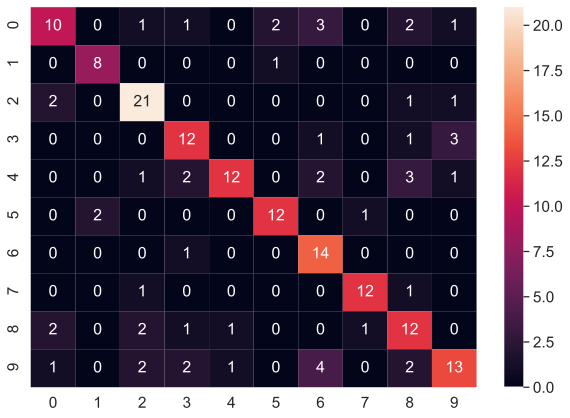

In [97]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_tst, y_pred_rfc)
df_cm = pd.DataFrame(array, range(10), range(10))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

In [68]:
Xtest = pd.read_csv('music30s_test.csv')
Xtest.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661504,0.326701,0.091451,0.056816,0.001078,1366.306035,468047.938162,1736.646891,185305.764094,2562.717631,...,2.877666,75.942657,1.237590,135.273865,1.965581,140.919281,0.791661,109.242943,-4.267680,177.675522
1,661794,0.437906,0.094107,0.005276,0.000030,971.777391,94103.177831,1614.749295,207167.296701,1906.571121,...,4.095938,14.534595,4.332311,13.931521,3.357461,15.662603,2.624509,20.659353,1.659115,23.679209
2,661504,0.457251,0.090083,0.285521,0.006891,2808.849567,939226.160293,2441.508002,158175.792905,5528.454222,...,12.258653,66.535225,-7.046246,67.616226,4.735236,58.401016,1.867201,57.100945,0.030806,67.664940
3,661794,0.342450,0.103002,0.045812,0.001188,1846.466568,732352.809385,2731.147995,342129.725183,4330.014059,...,3.157343,17.922062,0.284560,19.612217,-1.377794,20.133987,-1.593034,16.212904,-1.996848,18.466488
4,661794,0.294790,0.092382,0.061659,0.001761,2149.049179,699906.211340,2036.555526,130918.151667,4426.180712,...,-2.190892,69.668869,-13.639559,112.140495,-6.491189,47.259911,-9.144039,75.013718,-12.712146,63.297348


In [70]:
Xtest_ = Xtest.drop(columns = ["length"])
final_pred = rfc.predict(Xtest_)
len(final_pred)

100

In [75]:
Final_labels=  le.inverse_transform(final_pred)
Final_labels

array(['reggae', 'classical', 'hiphop', 'reggae', 'blues', 'reggae',
       'reggae', 'classical', 'reggae', 'reggae', 'blues', 'reggae',
       'reggae', 'reggae', 'blues', 'blues', 'blues', 'reggae', 'blues',
       'reggae', 'reggae', 'reggae', 'blues', 'classical', 'reggae',
       'hiphop', 'reggae', 'reggae', 'reggae', 'classical', 'blues',
       'classical', 'reggae', 'blues', 'reggae', 'blues', 'classical',
       'classical', 'reggae', 'disco', 'reggae', 'reggae', 'blues',
       'classical', 'hiphop', 'reggae', 'classical', 'reggae', 'reggae',
       'reggae', 'classical', 'reggae', 'blues', 'reggae', 'blues',
       'reggae', 'blues', 'reggae', 'reggae', 'reggae', 'reggae',
       'reggae', 'pop', 'reggae', 'classical', 'reggae', 'classical',
       'reggae', 'reggae', 'reggae', 'reggae', 'pop', 'reggae', 'blues',
       'classical', 'reggae', 'hiphop', 'reggae', 'reggae', 'reggae',
       'reggae', 'reggae', 'hiphop', 'blues', 'classical', 'blues',
       'blues', 'reggae'

In [89]:
x = np.arange(1,101)
np.savetxt('Rishikesh_Kulkarni_text.txt', Final_labels, fmt = '%s', delimiter=',')